# Midterm Project – UCSD Admissions 🎟

## Due Saturday, February 12th at 11:59PM PST

Welcome to the Midterm Project! Projects in DSC 10 are similar in format to homeworks, but are different in a few key ways. First, a project is comprehensive, meaning that it draws upon everything we've learned this quarter so far. Second, since problems can vary quite a bit in difficulty, some problems will be worth more points than others. Finally, in a project, the problems are more open-ended; they will usually ask for some result, but won't tell you what method should be used to get it. There might be several equally-valid approaches, and several steps might be necessary. This is closer to how data science is done in "real life".

It is important that you **start early** on the project! It will take the place of a homework in the week that it is due, but you should also expect it to take longer than a homework. You are especially encouraged to **find a partner** to work through the project with. If you work in a pair, you must follow the [Pair Programming Guidelines](https://dsc10.com/pair-programming/) on the course website. In particular, you must work together at the same time, and you are not allowed to split up the problems and each work on certain problems. If working in a pair, you should submit one notebook to Gradescope for the both of you. Use [this sheet](https://docs.google.com/spreadsheets/d/1m5eDcFdYTQq5bu9VRYINZBFgckCyJEOXZFZGZ9bQqKY/edit?usp=sharing) to find someone else to work with.

**Important:** The `otter` tests don't usually tell you that your answer is correct. More often, they help catch basic mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged.

**Unless explicitly directed to, do not use for-loops or import any packages.** Loops in Python are slow, and looping over arrays and DataFrames should usually be avoided in favor of commands that are meant specifically for these objects. Please do not import any additional packages - you don't need them, and our autograder may not be able to run your code if you do.

As you work through this project, there are a few resources you may want to have open:
- [DSC 10 Course Notes](https://notes.dsc10.com/front.html)
- [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view)
- [`babypandas` documentation](https://babypandas.readthedocs.io/en/latest/)
- Other links in the [Resources](https://dsc10.com/resources/) and [Debugging](https://dsc10.com/debugging/) tabs of the course website

Start early, good luck, and let's get started! 😎

In [1]:
# Don't change this cell; just run it. 
import numpy as np
import babypandas as bpd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import otter
grader = otter.Notebook()

Use this outline to help you quickly navigate to the part of the project you're working on:

- [The Data 🎓](#the-data)
- [Question 1 – Basic Enrollment Statistics 📈](#q1)
- [Question 2 – Digging Deeper 🕵️](#q2)
- [Question 3 – California Counties 📍](#q3)
- [Question 4 – The Bay vs. SoCal 🆚](#q4)
- [Question 5 – Out-of-State ✈️](#q5)

<a name='the-data'></a>

## The Data 🎓

In this project, we'll take a look at UC San Diego's undergraduate admissions numbers for the class of first-years (i.e. not transfers) that entered in the Fall of 2020. The data we'll work with comes directly from the [University of California's Information Center](https://www.universityofcalifornia.edu/infocenter/admissions-source-school).

Run the cell below to load in our data as a DataFrame into the variable `ucsd_admissions_raw`.

In [2]:
ucsd_admissions_raw = bpd.read_csv('data/ucsd-admissions-2020.csv')
ucsd_admissions_raw

,ID,Name,City,Region,Applied,Admitted,Enrolled
0,ABRAHAM LINCOLN HIGH SCHOOL52910,ABRAHAM LINCOLN HIGH SCHOOL,San Francisco,San Francisco,124,44,12
1,ABRAHAM LINCOLN HIGH SCHOOL53075,ABRAHAM LINCOLN HIGH SCHOOL,San Jose,Santa Clara,50,16,3
2,ACADEMY OF THE CANYONS53262,ACADEMY OF THE CANYONS,Santa Clarita,Los Angeles,58,33,11
3,ACADEMY OUR LADY OF PEACE52820,ACADEMY OUR LADY OF PEACE,San Diego,San Diego,61,27,8
4,ACALANES HIGH SCHOOL51315,ACALANES HIGH SCHOOL,Lafayette,Contra Costa,71,27,4
...,...,...,...,...,...,...,...
588,WOODROW WILSON HIGH SCHOOL51505,WOODROW WILSON HIGH SCHOOL,Long Beach,Los Angeles,104,42,5
589,WUHAN FOREIGN LANGUAGES SCHOOL694471,WUHAN FOREIGN LANGUAGES SCHOOL,NaN,NaN,141,42,9
590,XAVIER COLLEGE PREPARATORY HS54103,XAVIER COLLEGE PREPARATORY HS,Palm Desert,Riverside,39,9,4
591,YORBA LINDA HIGH SCHOOL54321,YORBA LINDA HIGH SCHOOL,Yorba Linda,Orange,103,26,7


Each row corresponds to a high school. For each high school, we have the following information:

| Column | Description |
|:---|:---|
| `'Name'`| The name of the high school. Note, this is not unique – for instance, the top two rows of `ucsd_admissions_raw` correspond to two different high schools both with the name `'ABRAHAM LINCOLN HIGH SCHOOL'`; one is in San Francisco and one is in San Jose. |
| `'City'` | The city in which the high school is located in. Note, only schools within the US have a valid `'City'` listed; international schools have a city of `NaN`. `NaN` means "missing value". See the code cell below. |
| `'Region'` | The county (**not** country) in which the `'City'` is located if it is in California, or the state in which the `'City'` is located if it is not in California but is inside the US. If the high school is not within the US, `'Region'` is `NaN` (like `'City'`). |
| `'Applied'` | The number of students who applied to UCSD from that high school for admission in Fall 2020. |
| `'Admitted'` | The number of students who were admitted to UCSD from that high school for admission in Fall 2020. |
| `'Enrolled'` | The number of students who actually chose to attend UCSD from that high school starting in Fall 2020. |

Run the cell below. There's nothing you need to change in it; it's just showing you one of the many international high schools in the dataset. Notice that its `'City'` and `'Region'` are both NaN (missing).

In [3]:
ucsd_admissions_raw[ucsd_admissions_raw.get('ID') == 'BEIJING NATIONAL DAY SCHOOL694342']

,ID,Name,City,Region,Applied,Admitted,Enrolled
31,BEIJING NATIONAL DAY SCHOOL694342,BEIJING NATIONAL DAY SCHOOL,NaN,NaN,155,53,10


<a name='q1'></a>

## Question 1 – Basic Enrollment Statistics 📈

Run the cell below to look at `ucsd_admissions_raw` again.

In [4]:
ucsd_admissions_raw

,ID,Name,City,Region,Applied,Admitted,Enrolled
0,ABRAHAM LINCOLN HIGH SCHOOL52910,ABRAHAM LINCOLN HIGH SCHOOL,San Francisco,San Francisco,124,44,12
1,ABRAHAM LINCOLN HIGH SCHOOL53075,ABRAHAM LINCOLN HIGH SCHOOL,San Jose,Santa Clara,50,16,3
2,ACADEMY OF THE CANYONS53262,ACADEMY OF THE CANYONS,Santa Clarita,Los Angeles,58,33,11
3,ACADEMY OUR LADY OF PEACE52820,ACADEMY OUR LADY OF PEACE,San Diego,San Diego,61,27,8
4,ACALANES HIGH SCHOOL51315,ACALANES HIGH SCHOOL,Lafayette,Contra Costa,71,27,4
...,...,...,...,...,...,...,...
588,WOODROW WILSON HIGH SCHOOL51505,WOODROW WILSON HIGH SCHOOL,Long Beach,Los Angeles,104,42,5
589,WUHAN FOREIGN LANGUAGES SCHOOL694471,WUHAN FOREIGN LANGUAGES SCHOOL,NaN,NaN,141,42,9
590,XAVIER COLLEGE PREPARATORY HS54103,XAVIER COLLEGE PREPARATORY HS,Palm Desert,Riverside,39,9,4
591,YORBA LINDA HIGH SCHOOL54321,YORBA LINDA HIGH SCHOOL,Yorba Linda,Orange,103,26,7


In [5]:
ucsd_admissions_raw[ucsd_admissions_raw.get('Name')=='CHATTAHOOCHEE HIGH SCHOOL']

,ID,Name,City,Region,Applied,Admitted,Enrolled


It's a good idea to set the index of our DataFrame to something more meaningful than 0, 1, 2, 3, ... if possible. It turns out that we cannot use `'Name'` as the index here, because there are some high schools with the same name (and we'd like the index of our DataFrame to be unique). One such example is `'ABRAHAM LINCOLN HIGH SCHOOL'`, as was mentioned in the table that described each of the columns of our data.

Instead, we'll have to use `'ID'` as our index, as it is unique for each school (note that the two `'ABRAHAM LINCOLN HIGH SCHOOL'`s have different `'ID'`s).

### Question 1.1 (1 point)

Assign `ucsd` to the DataFrame that results from setting the index of `ucsd_admissions_raw` to `'ID'`.

<!--
BEGIN QUESTION
name: q1_1
points: 1
-->

In [6]:
ucsd = ucsd_admissions_raw.set_index('ID')
ucsd

,Name,City,Region,Applied,Admitted,Enrolled
ID,,,,,,
ABRAHAM LINCOLN HIGH SCHOOL52910,ABRAHAM LINCOLN HIGH SCHOOL,San Francisco,San Francisco,124,44,12
ABRAHAM LINCOLN HIGH SCHOOL53075,ABRAHAM LINCOLN HIGH SCHOOL,San Jose,Santa Clara,50,16,3
ACADEMY OF THE CANYONS53262,ACADEMY OF THE CANYONS,Santa Clarita,Los Angeles,58,33,11
ACADEMY OUR LADY OF PEACE52820,ACADEMY OUR LADY OF PEACE,San Diego,San Diego,61,27,8
ACALANES HIGH SCHOOL51315,ACALANES HIGH SCHOOL,Lafayette,Contra Costa,71,27,4
...,...,...,...,...,...,...
WOODROW WILSON HIGH SCHOOL51505,WOODROW WILSON HIGH SCHOOL,Long Beach,Los Angeles,104,42,5
WUHAN FOREIGN LANGUAGES SCHOOL694471,WUHAN FOREIGN LANGUAGES SCHOOL,NaN,NaN,141,42,9
XAVIER COLLEGE PREPARATORY HS54103,XAVIER COLLEGE PREPARATORY HS,Palm Desert,Riverside,39,9,4


In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Great – we'll use `ucsd` moving forward instead of `ucsd_admissions_raw`.

### Question 1.2 (1 point)

Acceptance rate is defined as $$\text{Acceptance Rate} = \frac{\text{# Admitted}}{\text{# Applied}}$$

Amongst students in the dataset, what was the overall acceptance rate at UCSD? Compute the acceptance rate as a proportion, and save your answer to the name `overall_acceptance`.

<!--
BEGIN QUESTION
name: q1_2
points: 1
-->

In [8]:
overall_acceptance = ucsd.get('Admitted').sum() / ucsd.get('Applied').sum()
overall_acceptance

0.35652437790815295

In [9]:
grader.check("q1_2")

q1_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 1.3 (1 point)

The site [acceptancerate.com](https://www.acceptancerate.com/schools/university-of-california-san-diego) states the following:

> The overall acceptance rate for University of California-San Diego was reported as 31.5% in Fall 2020 with over 99100 applications submitted to UCSD. Both in state and out of state applicants are included in these figures. We do not have data on transfer acceptance rates currently.

31.5% is quite different than the acceptance rate you found in Question 1.2. Why is there a discrepancy between the number quoted above and the result you found?

_**Hint:**_ The answer is **not** that the website [acceptancerate.com](https://www.acceptancerate.com/schools/university-of-california-san-diego) is not credible. Instead, to find the answer, you'll want to look at the fine print at the [site we downloaded the data from](https://www.universityofcalifornia.edu/infocenter/admissions-source-school).


<!--
BEGIN QUESTION
name: q1_3
points: 1
manual: true
-->

It is because the website acceptancerate.com does not include international students acceptance rate, so the rate is quite different from our result.

<!-- END QUESTION -->

### Question 1.4 (1 point)

Yield rate is defined as

$$\text{Yield Rate} = \frac{\text{# Enrolled}}{\text{# Admitted}}$$

Below, add two columns to `ucsd`: `'AcceptanceRate'`, describing the acceptance rate at each high school, and `'YieldRate'`, describing the yield rate of each high school. Sort the resulting DataFrame so that high schools with the highest acceptance rates are at the top. Assign the name `ucsd_admit` to the resulting DataFrame.

<!--
BEGIN QUESTION
name: q1_4
points: 1
-->

In [10]:
ucsd_admit = ucsd_1_4_1 = ucsd.get('Admitted') / ucsd.get('Applied')
ucsd_1_4_2 = ucsd.get('Enrolled') / ucsd.get('Admitted')
ucsd_1_4_3 = ucsd.assign(AcceptanceRate=ucsd_1_4_1)
ucsd_1_4_4 = ucsd_1_4_3.assign(YieldRate=ucsd_1_4_2)
ucsd_admit = ucsd_1_4_4.sort_values('AcceptanceRate',ascending=False)
ucsd_admit

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
BEN LIPPEN SCHOOL410501,BEN LIPPEN SCHOOL,Columbia,SC,7,6,3,0.857143,0.500000
PELHAM MEMORIAL HIGH SCHOOL334470,PELHAM MEMORIAL HIGH SCHOOL,Pelham,NY,7,6,3,0.857143,0.500000
BASIS SCOTTSDALE CHARTER SCH30660,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,22,18,4,0.818182,0.222222
SOUTHSIDE CHRISTIAN SCHOOL410907,SOUTHSIDE CHRISTIAN SCHOOL,Simpsonville,SC,5,4,3,0.800000,0.750000
FREEDOM HIGH SCHOOL472110,FREEDOM HIGH SCHOOL,South Riding,VA,5,4,3,0.800000,0.750000
...,...,...,...,...,...,...,...,...
LINCOLN HIGH SCHOOL54120,LINCOLN HIGH SCHOOL,San Diego,San Diego,66,11,7,0.166667,0.636364
CRAWFORD HIGH SCHOOL54630,CRAWFORD HIGH SCHOOL,San Diego,San Diego,81,13,5,0.160494,0.384615
NORWALK HIGH SCHOOL52167,NORWALK HIGH SCHOOL,Norwalk,Los Angeles,39,6,3,0.153846,0.500000


In [11]:
grader.check("q1_4")

q1_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 1.5 (1 point)

Let's see if there's a relationship between the acceptance rates and yield rates of high schools in `ucsd_admit`. To do this, create a scatter plot with `'AcceptanceRate'` on the $x$-axis and `'YieldRate'` on the $y$-axis.

Does there seem to be any trend in the relationship between acceptance rates and yield rates? (You don't need to answer this interpretation question anywhere; all you need to do in this question is create a plot.)

<!--
BEGIN QUESTION
name: q1_5
points: 1
manual: true
-->

<AxesSubplot:xlabel='AcceptanceRate', ylabel='YieldRate'>

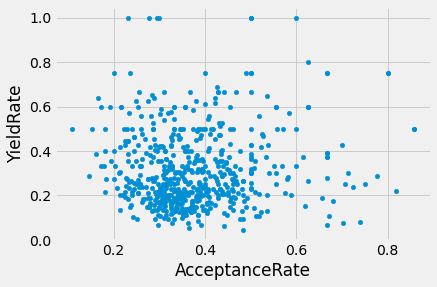

In [12]:
ucsd_admit.plot(kind='scatter',x='AcceptanceRate', y='YieldRate')

<!-- END QUESTION -->

### Question 1.6 (2 points)

Let's try and identify the high schools with very low and very high acceptance rates. Assign `top_eight_acc` to an **array** of the **names** (not IDs) of the high schools with the 8 highest acceptance rates, and `bottom_eight_acc` to an **array** of the **names** of the high schools with the 8 lowest acceptance rates. The order of the names within your arrays does not matter.

_**Note:**_ Do **not** explicitly type the names of any of the high schools. Instead, use a combination of DataFrame, Series, and array manipulation techniques to create both arrays using code.

<!--
BEGIN QUESTION
name: q1_6
points: 2
-->

In [13]:
ucsd1_6 = ucsd_admit.take(np.arange(8)).get('Name')
ucsd1_6_1 = ucsd_admit.take(np.arange(-9, -1)).sort_values('AcceptanceRate').get('Name')

top_eight_acc = np.array(ucsd1_6)
bottom_eight_acc = np.array(ucsd1_6_1)

#Don't change the code below – it just shows you the two arrays you created.
print('Schools with the 8 highest acceptance rates:')
for school in top_eight_acc:
    print(school)
print('\nSchools with the 8 lowest acceptance rates:')
for school in bottom_eight_acc:
    print(school)

Schools with the 8 highest acceptance rates:
BEN LIPPEN SCHOOL
PELHAM MEMORIAL HIGH SCHOOL
BASIS SCOTTSDALE CHARTER SCH
SOUTHSIDE CHRISTIAN SCHOOL
FREEDOM HIGH SCHOOL
MARY INSTITUTE AND SAINT LOUIS
GULLIVER PREPARATORY SCHOOL
SKYLINE HIGH SCHOOL

Schools with the 8 lowest acceptance rates:
ORANGE VISTA HIGH SCHOOL
NORWALK HIGH SCHOOL
CRAWFORD HIGH SCHOOL
LINCOLN HIGH SCHOOL
ATTACHED MIDDLE SCH JIANGXI U
GUANGDONG EXPERIMENTAL HS
DULWICH INTRNTL HS SUZHOU
SCHURR HIGH SCHOOL


In [14]:
grader.check("q1_6")

q1_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 1.7 (2 points)

Below, complete the implementation of the function `plot_top_n`, which takes in an integer `n` and displays a horizontal overlaid bar chart with:
- One label on the $y$-axis for each of the top `n` high schools that had the most applicants to UCSD. Labels should be the **names** of the high schools, not IDs.
- For each of the aforementioned high schools, one bar displaying the number of students who applied to UCSD, and another bar displaying the number of students who were admitted to UCSD.
- Labels should be sorted such that the school at the top had the most applicants.

For example, `plot_top_n(10)` should show the plot below. Note that `plot_top_n` should not return anything, it should only display a chart.

<img src='images/example-17.png' width=500>

<!--
BEGIN QUESTION
name: q1_7
points: 2
manual: true
-->

In [15]:
def plot_top_n(n):
    ucsd_1_7=ucsd.sort_values('Applied', ascending=False).take(np.arange(n))
    ucsd_1_7_1 = ucsd_1_7.set_index('Name').sort_values('Applied')
    ucsd_1_7_1.plot(kind='barh',y=['Applied','Admitted'])

In [16]:
# ucsd_1_7=ucsd.sort_values('Applied', ascending=False).take(np.arange(3))
# # ucsd_1_7[ucsd_1_7.take(np.arange==1)]
# ucsd_1_7_1 = ucsd_1_7.set_index('Name')
# ucsd_1_7_1

<!-- END QUESTION -->



Now, run the cell below to call both `plot_top_n(10)` and `plot_top_n(15)`. This question isn't autograded; instead, we'll be manually verifying that both your code and your outputs below look correct.

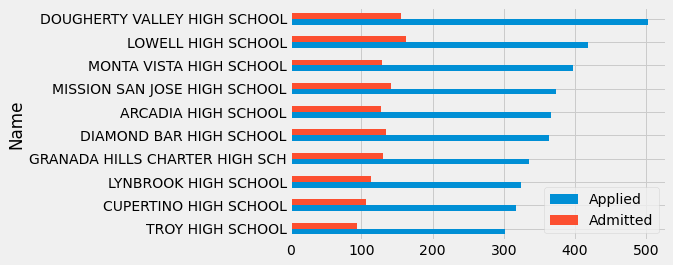

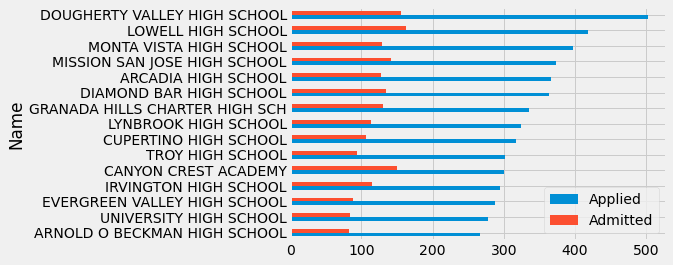

In [17]:
plot_top_n(10)
plot_top_n(15)

Do you see your high school above? There's a good chance you do, statistically speaking!

<a name='q2'></a>

## Question 2 – Digging Deeper 🕵️

Now that we've gotten a feel for the `ucsd_admit` dataset, let's perform some queries to learn a bit more about the nature of admissions at UCSD.

### Question 2.1 (1 point)

Let's first look at students from San Diego County. Set `sd_county` to a DataFrame of only the high schools in San Diego County. `sd_county` should have all of the columns that `ucsd_admit` has.

_**Note:**_ We're referring to San Diego County, not the City of San Diego!

In [18]:
sd_county = ucsd_admit[ucsd_admit.get('Region')=='San Diego']
sd_county

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
GROSSMONT MIDDLE COLLEGE HS50828,GROSSMONT MIDDLE COLLEGE HS,El Cajon,San Diego,6,4,3,0.666667,0.750000
KEARNY ENG INNOV & DESIGN53217,KEARNY ENG INNOV & DESIGN,San Diego,San Diego,14,8,4,0.571429,0.500000
RANCHO BUENA VISTA HIGH SCHOOL53668,RANCHO BUENA VISTA HIGH SCHOOL,Vista,San Diego,61,34,17,0.557377,0.500000
MATER DEI CATHOLIC HIGH SCHOOL51244,MATER DEI CATHOLIC HIGH SCHOOL,Chula Vista,San Diego,49,27,9,0.551020,0.333333
SWEETWATER UNION HIGH SCHOOL52105,SWEETWATER UNION HIGH SCHOOL,National City,San Diego,95,51,33,0.536842,0.647059
...,...,...,...,...,...,...,...,...
DEL LAGO ACADEMY54746,DEL LAGO ACADEMY,Escondido,San Diego,69,18,10,0.260870,0.555556
GOMPERS PREPARATORY ACADEMY54353,GOMPERS PREPARATORY ACADEMY,San Diego,San Diego,94,24,16,0.255319,0.666667
CORONADO HIGH SCHOOL50680,CORONADO HIGH SCHOOL,Coronado,San Diego,63,15,4,0.238095,0.266667


In [19]:
grader.check("q2_1")

q2_1 results: All test cases passed!

### Question 2.2 (1 point)

Compute the overall acceptance rate of students from the county of San Diego. Assign your answer to `sd_county_acceptance`.

_**Hint:**_ If you find yourself computing the mean of a column in `sd_county`, you may want to reconsider your approach.

In [20]:
sd_county_acceptance = sd_county.get('Admitted').sum() / sd_county.get('Applied').sum()
sd_county_acceptance

0.40467275722629925

In [21]:
grader.check("q2_2")

q2_2 results: All test cases passed!

### Question 2.3 (1 point)

Run the following cell.

In [22]:
print('Overall acceptance rate:', overall_acceptance)
print('SD County acceptance rate:', sd_county_acceptance)

Overall acceptance rate: 0.35652437790815295
SD County acceptance rate: 0.40467275722629925


Compare the two acceptance rates. What do you notice? Just by looking at the results, we can't conclude exactly why this difference exists, but can you think of a possible reason?

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_3
points: 1
manual: true
-->

UCSD may prefers students from San Diego county.

<!-- END QUESTION -->



### Question 2.4 (1 point)

How many high schools in the county of San Diego had at least 100 applicants and an acceptance rate of at least 40%? Assign your answer to the name `county_query_count`.

In [23]:
sd_county

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
GROSSMONT MIDDLE COLLEGE HS50828,GROSSMONT MIDDLE COLLEGE HS,El Cajon,San Diego,6,4,3,0.666667,0.750000
KEARNY ENG INNOV & DESIGN53217,KEARNY ENG INNOV & DESIGN,San Diego,San Diego,14,8,4,0.571429,0.500000
RANCHO BUENA VISTA HIGH SCHOOL53668,RANCHO BUENA VISTA HIGH SCHOOL,Vista,San Diego,61,34,17,0.557377,0.500000
MATER DEI CATHOLIC HIGH SCHOOL51244,MATER DEI CATHOLIC HIGH SCHOOL,Chula Vista,San Diego,49,27,9,0.551020,0.333333
SWEETWATER UNION HIGH SCHOOL52105,SWEETWATER UNION HIGH SCHOOL,National City,San Diego,95,51,33,0.536842,0.647059
...,...,...,...,...,...,...,...,...
DEL LAGO ACADEMY54746,DEL LAGO ACADEMY,Escondido,San Diego,69,18,10,0.260870,0.555556
GOMPERS PREPARATORY ACADEMY54353,GOMPERS PREPARATORY ACADEMY,San Diego,San Diego,94,24,16,0.255319,0.666667
CORONADO HIGH SCHOOL50680,CORONADO HIGH SCHOOL,Coronado,San Diego,63,15,4,0.238095,0.266667


In [24]:
county_query_count = sd_county[(sd_county.get('Applied')>=100) & (sd_county.get('AcceptanceRate')>=0.4)].shape[0]
county_query_count

15

In [25]:
grader.check("q2_4")

q2_4 results: All test cases passed!

### Question 2.5 (2 points)

Assign the name `city_query` to a DataFrame containing all high schools from the **city** of San Diego with between 100 (inclusive) and 200 (inclusive) applicants and an acceptance rate between 25% (inclusive) and 35% (inclusive). `city_query` should have all of the columns that `ucsd_admit` has.

In [26]:
ucsd_admit

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
BEN LIPPEN SCHOOL410501,BEN LIPPEN SCHOOL,Columbia,SC,7,6,3,0.857143,0.500000
PELHAM MEMORIAL HIGH SCHOOL334470,PELHAM MEMORIAL HIGH SCHOOL,Pelham,NY,7,6,3,0.857143,0.500000
BASIS SCOTTSDALE CHARTER SCH30660,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,22,18,4,0.818182,0.222222
SOUTHSIDE CHRISTIAN SCHOOL410907,SOUTHSIDE CHRISTIAN SCHOOL,Simpsonville,SC,5,4,3,0.800000,0.750000
FREEDOM HIGH SCHOOL472110,FREEDOM HIGH SCHOOL,South Riding,VA,5,4,3,0.800000,0.750000
...,...,...,...,...,...,...,...,...
LINCOLN HIGH SCHOOL54120,LINCOLN HIGH SCHOOL,San Diego,San Diego,66,11,7,0.166667,0.636364
CRAWFORD HIGH SCHOOL54630,CRAWFORD HIGH SCHOOL,San Diego,San Diego,81,13,5,0.160494,0.384615
NORWALK HIGH SCHOOL52167,NORWALK HIGH SCHOOL,Norwalk,Los Angeles,39,6,3,0.153846,0.500000


In [27]:
sd_city = sd_county[sd_county.get('City')=='San Diego']
city_query = sd_city[(sd_city.get('Applied')>=100) & (sd_city.get('Applied')<=200) & (sd_city.get('AcceptanceRate')>=0.25) & (sd_city.get('AcceptanceRate')<=0.35)]
city_query

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
PATRICK HENRY HIGH SCHOOL52867,PATRICK HENRY HIGH SCHOOL,San Diego,San Diego,127,42,20,0.330709,0.476190
MT CARMEL HIGH SCHOOL52862,MT CARMEL HIGH SCHOOL,San Diego,San Diego,101,33,19,0.326733,0.575758
HERBERT HOOVER HIGH SCHOOL52850,HERBERT HOOVER HIGH SCHOOL,San Diego,San Diego,141,40,26,0.283688,0.650000


In [28]:
grader.check("q2_5")

q2_5 results: All test cases passed!

### Question 2.6 (2 points)

Assign the name `burbs` to a DataFrame containing all high schools in Los Angeles County but not the City of Los Angeles, and all of the high schools in San Diego County but not the City of San Diego. `burbs` should have all of the columns that `ucsd_admit` has.

In [29]:
burbs = ucsd_admit[((ucsd_admit.get('Region') == 'Los Angeles') & (ucsd_admit.get('City') != 'Los Angeles')) | ((ucsd_admit.get('Region') == 'San Diego') & (ucsd_admit.get('City') != 'San Diego'))]
burbs

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
GROSSMONT MIDDLE COLLEGE HS50828,GROSSMONT MIDDLE COLLEGE HS,El Cajon,San Diego,6,4,3,0.666667,0.750000
CALIFORNIA ACAD MATH & SCIENCE50491,CALIFORNIA ACAD MATH & SCIENCE,Carson,Los Angeles,122,71,20,0.581967,0.281690
HERITAGE CHRISTIAN SCHOOL53358,HERITAGE CHRISTIAN SCHOOL,North Hills,Los Angeles,19,11,3,0.578947,0.272727
MALIBU HIGH SCHOOL51896,MALIBU HIGH SCHOOL,Malibu,Los Angeles,33,19,4,0.575758,0.210526
ACADEMY OF THE CANYONS53262,ACADEMY OF THE CANYONS,Santa Clarita,Los Angeles,58,33,11,0.568966,0.333333
...,...,...,...,...,...,...,...,...
SOUTH HILLS HIGH SCHOOL50704,SOUTH HILLS HIGH SCHOOL,West Covina,Los Angeles,40,9,4,0.225000,0.444444
SHERMAN OAKS CTR ENRCHED STDS52617,SHERMAN OAKS CTR ENRCHED STDS,Reseda,Los Angeles,68,15,3,0.220588,0.200000
SATO ACADEMY OF MATH & SCIENCE54837,SATO ACADEMY OF MATH & SCIENCE,Long Beach,Los Angeles,23,5,3,0.217391,0.600000


In [30]:
grader.check("q2_6")

q2_6 results: All test cases passed!

### Question 2.7 (2 points)

If we wanted to learn about the admissions statistics of a particular high school, we'd need to write a query, which can get cumbersome. Here, we'll write a function to make this process a bit easier. 

Below, complete the implementation of the function `school_stats`, which takes in the **name** (not the ID) of a high school and returns an **array** with three values, containing the number of students who applied, were admitted, and enrolled at UCSD from that high school, in that order. If there is no school with the input name or there are multiple schools with the input name, return the array `np.array([0, 0, 0])`. You may assume the input name is in uppercase.

Example behavior is shown below.

```py
# From CANYON CREST ACADEMY, 300 students applied, 150 were admitted, and 35 enrolled
>>> school_stats('CANYON CREST ACADEMY')
array([300, 150, 35])

# There is no school named VINCENT MASSEY SECONDARY SCHOOL in ucsd_admit
>>> school_stats('VINCENT MASSEY SECONDARY SCHOOL')
array([0, 0, 0])
```

_**Note:**_ Once you've implemented the function, you should verify that it works as intended by trying a few examples yourself. Try it out on your high school! (Fun fact – `'VINCENT MASSEY SECONDARY SCHOOL'` is the high school that Suraj went to.)

In [31]:
def school_stats(name):
        if ucsd[ucsd.get('Name').str.contains(name)].shape[0] != 1:
            return np.array([0,0,0])
        else:
            return np.array(ucsd.set_index('Name').get(['Applied','Admitted','Enrolled']).loc[name])

In [32]:
school_stats('CANYON CREST ACADEMY')

array([300, 150,  35])

In [33]:
grader.check("q2_7")

q2_7 results: All test cases passed!

### Question 2.8 (2 points)

Now, complete the implementation of the function `school_stats_multiple`, which takes in a **list** of school names and returns an array of three values, containing the **total** number of students who applied, were admitted, and enrolled at UCSD from those high schools combined.

If any of the names in `schools` are not valid schools or if there are multiple schools with a given name, `school_stats_multiple` again returns the array `np.array([0, 0, 0])`. Example behavior is shown below.

```py
# From these three high schools combined, 754 students applied, 326 were admitted, and 76 enrolled
>>> school_stats_multiple(['CANYON CREST ACADEMY', 'TORREY PINES HIGH SCHOOL', 'BERKELEY HIGH SCHOOL'])
array([754, 326, 76])

# There is no school named VINCENT MASSEY SECONDARY SCHOOL in ucsd_admit
>>> school_stats_multiple(['VINCENT MASSEY SECONDARY SCHOOL', 'CANYON CREST ACADEMY'])
array([0, 0, 0])
```

_**Hint 1:**_ Don't reinvent the wheel – use the function `school_stats` in your implementation of `school_stats_multiple`.

_**Hint 2:**_ You will need to use a for-loop.

In [34]:
def school_stats_multiple(schools):
    result = np.array([0, 0, 0])
    for i in range(len(schools)):
        n = school_stats(schools[i])
        if n[0]==0:
            return np.array([0, 0, 0])
        result = result + n
    return result

school_stats_multiple(['CANYON CREST ACADEMY', 'TORREY PINES HIGH SCHOOL', 'BERKELEY HIGH SCHOOL'])
# how do I check if any of the names in schools are not valid schools or if there are multiple schools with a given name, school_stats_multiple again returns the array np.array([0, 0, 0])
# what's wrong with this code?

array([754, 326,  76])

In [35]:
grader.check("q2_8")

q2_8 results: All test cases passed!

<a name='q3'></a>

## Question 3 – California Counties 📍

Let's switch our focus to studying the nature of admissions at UCSD for in-state high schools, based on county.

Note that the `'Region'` column of `ucsd_admit` contains a variety of values. From the data description table at the start of the project, the `'Region'` column contains:

> The county (**not** country) in which the `'City'` is located if it is in California, or the state in which the `'City'` is located if it is not in California but is inside the US. If the high school is not within the US, `'Region'` is `NaN` (`NaN` means "missing value").

In [36]:
ucsd_admit

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
BEN LIPPEN SCHOOL410501,BEN LIPPEN SCHOOL,Columbia,SC,7,6,3,0.857143,0.500000
PELHAM MEMORIAL HIGH SCHOOL334470,PELHAM MEMORIAL HIGH SCHOOL,Pelham,NY,7,6,3,0.857143,0.500000
BASIS SCOTTSDALE CHARTER SCH30660,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,22,18,4,0.818182,0.222222
SOUTHSIDE CHRISTIAN SCHOOL410907,SOUTHSIDE CHRISTIAN SCHOOL,Simpsonville,SC,5,4,3,0.800000,0.750000
FREEDOM HIGH SCHOOL472110,FREEDOM HIGH SCHOOL,South Riding,VA,5,4,3,0.800000,0.750000
...,...,...,...,...,...,...,...,...
LINCOLN HIGH SCHOOL54120,LINCOLN HIGH SCHOOL,San Diego,San Diego,66,11,7,0.166667,0.636364
CRAWFORD HIGH SCHOOL54630,CRAWFORD HIGH SCHOOL,San Diego,San Diego,81,13,5,0.160494,0.384615
NORWALK HIGH SCHOOL52167,NORWALK HIGH SCHOOL,Norwalk,Los Angeles,39,6,3,0.153846,0.500000


### Question 3.1 (2 points)

Below, complete the implementation of the function `in_cali`, which takes in the name of a region and returns `True` if that region is a county in California and `False` otherwise. Example behavior is shown below.

```py
>>> in_cali('San Diego')
True

>>> in_cali('PA')
False

>>> in_cali(np.nan) # This is the region for international schools
False

>>> in_cali('Unknown')
False
```

_**Notes:**_
1. The line `region = str(region)` may seem redundant, since all of the regions are already strings. However, missing values (`NaN`) aren't technically stored as strings; this line converts the missing value to a string. This makes it easy to check if a region is missing; all you need to do is check if `region == 'nan'`.
2. There is a single row in `ucsd_admit` with a region of `'Unknown'`. If you look at this row you'll see that it technically corresponds to a high school in California, but since we don't know the county that the school is in, we will treat it as being out-of-state. As such, `in_cali` should return `False` if `region` is `'Unknown'`.

In [37]:
def in_cali(region):
    region = str(region) # Don't change this
    if region == 'nan':
        return False
    ucsd_3_1 = ucsd_admit[ucsd_admit.get('Region') == region].get('Region').iloc[0]
    if ucsd_3_1 == 'Unknown':
        return False
    elif len(ucsd_3_1) == 2:
        return False
    else:
        return True
in_cali(np.nan)

False

In [38]:
grader.check("q3_1")

q3_1 results: All test cases passed!

### Question 3.2 (1 point)

Below, create two DataFrames:
- `ucsd_state`, which has all of the columns in `ucsd_admit` plus a new column, `'instate'`, which contains a Boolean value describing whether each high school is in-state or not (decided according to the function in 3.1), and
- `instate_only`, which contains only the high schools that are in-state. `instate_only` should have the same columns as `ucsd_admit`; it should not have a column named `'instate'` since all schools in `instate_only` will be in-state.

In [39]:
ucsd_state = ucsd_admit.assign(instate=ucsd_admit.get('Region').apply(in_cali))
instate_only = ucsd_state[ucsd_state.get('instate')==True].drop(columns='instate')

# Don't change the code below – it just shows you the two DataFrames you created.
print('ucsd_state')
display(ucsd_state)
print('\ninstate_only')
display(instate_only)

ucsd_state


,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate,instate
ID,,,,,,,,,
BEN LIPPEN SCHOOL410501,BEN LIPPEN SCHOOL,Columbia,SC,7,6,3,0.857143,0.500000,False
PELHAM MEMORIAL HIGH SCHOOL334470,PELHAM MEMORIAL HIGH SCHOOL,Pelham,NY,7,6,3,0.857143,0.500000,False
BASIS SCOTTSDALE CHARTER SCH30660,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,22,18,4,0.818182,0.222222,False
SOUTHSIDE CHRISTIAN SCHOOL410907,SOUTHSIDE CHRISTIAN SCHOOL,Simpsonville,SC,5,4,3,0.800000,0.750000,False
FREEDOM HIGH SCHOOL472110,FREEDOM HIGH SCHOOL,South Riding,VA,5,4,3,0.800000,0.750000,False
...,...,...,...,...,...,...,...,...,...
LINCOLN HIGH SCHOOL54120,LINCOLN HIGH SCHOOL,San Diego,San Diego,66,11,7,0.166667,0.636364,True
CRAWFORD HIGH SCHOOL54630,CRAWFORD HIGH SCHOOL,San Diego,San Diego,81,13,5,0.160494,0.384615,True
NORWALK HIGH SCHOOL52167,NORWALK HIGH SCHOOL,Norwalk,Los Angeles,39,6,3,0.153846,0.500000,True



instate_only


,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
PAJARO VALLEY HS54045,PAJARO VALLEY HS,Watsonville,Santa Cruz,14,10,3,0.714286,0.300000
LEADERSHIP PUBLIC SCH HAYWARD51231,LEADERSHIP PUBLIC SCH HAYWARD,Hayward,Alameda,17,12,3,0.705882,0.250000
GROSSMONT MIDDLE COLLEGE HS50828,GROSSMONT MIDDLE COLLEGE HS,El Cajon,San Diego,6,4,3,0.666667,0.750000
MIDDLE COLLEGE HIGH SCHOOL53258,MIDDLE COLLEGE HIGH SCHOOL,Santa Ana,Orange,27,18,7,0.666667,0.388889
IMPERIAL HIGH SCHOOL51240,IMPERIAL HIGH SCHOOL,Imperial,Imperial,27,18,7,0.666667,0.388889
...,...,...,...,...,...,...,...,...
LINCOLN HIGH SCHOOL54120,LINCOLN HIGH SCHOOL,San Diego,San Diego,66,11,7,0.166667,0.636364
CRAWFORD HIGH SCHOOL54630,CRAWFORD HIGH SCHOOL,San Diego,San Diego,81,13,5,0.160494,0.384615
NORWALK HIGH SCHOOL52167,NORWALK HIGH SCHOOL,Norwalk,Los Angeles,39,6,3,0.153846,0.500000


In [40]:
grader.check("q3_2")

q3_2 results: All test cases passed!

### Question 3.3 (1 point)

Assign the name `california_counties` to a DataFrame indexed by county name that contains, for each California county, the total number of students who applied to, were admitted to, and enrolled at UCSD from each county. Sort by number of applicants in decreasing order.

The first few rows of `california_counties` should look like this:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Applied</th>
      <th>Admitted</th>
      <th>Enrolled</th>
    </tr>
    <tr>
      <th>Region</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Los Angeles</th>
      <td>11155</td>
      <td>4043</td>
      <td>957</td>
    </tr>
    <tr>
      <th>San Diego</th>
      <td>6677</td>
      <td>2702</td>
      <td>1141</td>
    </tr>
    <tr>
      <th>Orange</th>
      <td>6156</td>
      <td>2010</td>
      <td>440</td>
    </tr>
    <tr>
      <th>Santa Clara</th>
      <td>5610</td>
      <td>1855</td>
      <td>295</td>
    </tr>
    <tr>
      <th>Alameda</th>
      <td>3418</td>
      <td>1147</td>
      <td>263</td>
    </tr>
  </tbody>
</table>

**_Hint 1:_** Start with `instate_only`.

**_Hint 2:_** In both this subpart and the rest of Question 3, expect to use `groupby` often.

In [41]:
california_counties = instate_only.groupby('Region').sum().drop(columns=['AcceptanceRate', 'YieldRate']).sort_values('Applied', ascending=False)
california_counties

,Applied,Admitted,Enrolled
Region,,,
Los Angeles,11155,4043,957
San Diego,6677,2702,1141
Orange,6156,2010,440
Santa Clara,5610,1855,295
Alameda,3418,1147,263
...,...,...,...
Monterey,55,21,7
Merced,22,10,5
Tulare,14,5,3


In [42]:
grader.check("q3_3")

q3_3 results: All test cases passed!

### Question 3.4 (1 point)

**Task 1:** Below, complete the implementation of the function `add_rates`, which takes in a DataFrame that has columns named `'Applied'`, `'Admitted'`, and `'Enrolled'`, and returns the same DataFrame with two added columns, `'AcceptanceRate'` and `'YieldRate'`. 

These columns contain the values you'd expect – respectively, they contain the number of students who applied to, were admitted to, and enrolled at UCSD for each row, as well as the acceptance rate and yield rate at UCSD for each row. Each row of the input DataFrame may correspond to a school, or each row of the input DataFrame may correspond to a county – the way you implement `add_rates` should be the same in both cases. Sort the resulting DataFrame by `'AcceptanceRate'` in descending order.

**Task 2:** After defining `add_rates`, define a new DataFrame named `california_counties_admit` that contains all of the columns in `california_counties` plus two new columns, `'AcceptanceRate'` and `'YieldRate'`, containing the overall acceptance rate and yield rate for each county. This will only take one line of code.

_**Hint:**_ Note that the function `add_rates` is a generalization of the code you wrote in Question 1.4; we'd recommend starting by copying the code you wrote there.

In [43]:
# instate_only[instate_only.get('Region')=='Los Angeles']

In [44]:
def add_rates(df):
    a = df.get('Admitted')/df.get('Applied')
    b = df.get('Enrolled')/df.get('Admitted')
    return df.assign(AcceptanceRate=a).assign(YieldRate=b)
california_counties_admit = add_rates(california_counties)
california_counties_admit

,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
Region,,,,,
Los Angeles,11155,4043,957,0.362438,0.236705
San Diego,6677,2702,1141,0.404673,0.422280
Orange,6156,2010,440,0.326511,0.218905
Santa Clara,5610,1855,295,0.330660,0.159030
Alameda,3418,1147,263,0.335576,0.229294
...,...,...,...,...,...
Monterey,55,21,7,0.381818,0.333333
Merced,22,10,5,0.454545,0.500000
Tulare,14,5,3,0.357143,0.600000


In [45]:
grader.check("q3_4")

q3_4 results: All test cases passed!

### Question 3.5 (3 points)

In the previous question, we determined the admissions rate and yield rate for each California county. Now, for each county, we want to know the following information:
- `'num_schools'`: the number of high schools from that county in the dataset
- `'max_enrolled'`: the largest number of students any high school in that county had enroll at UCSD
- `'mean_enrolled'`: the average (mean) number of students enrolled at UCSD from high schools in that county
- `'median_enrolled'`: the median number of students enrolled at UCSD from high schools in that county

Below, assign `county_stats` to a DataFrame indexed by county name with four columns, `'num_schools'`, `'max_enrolled'`, `'mean_enrolled'`, and `'median_enrolled'`, corresponding to the statistics above. Keep only the counties that had at least 3 schools in the dataset. Sort `county_stats` by `'mean_enrolled'` in descending order. 

The first few rows of `county_stats` are shown below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num_schools</th>
      <th>max_enrolled</th>
      <th>mean_enrolled</th>
      <th>median_enrolled</th>
    </tr>
    <tr>
      <th>Region</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>San Diego</th>
      <td>87</td>
      <td>44</td>
      <td>13.114943</td>
      <td>9.0</td>
    </tr>
    <tr>
      <th>San Francisco</th>
      <td>8</td>
      <td>29</td>
      <td>9.875000</td>
      <td>7.5</td>
    </tr>
    <tr>
      <th>Alameda</th>
      <td>27</td>
      <td>49</td>
      <td>9.740741</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Contra Costa</th>
      <td>15</td>
      <td>37</td>
      <td>9.266667</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Orange</th>
      <td>55</td>
      <td>23</td>
      <td>8.000000</td>
      <td>6.0</td>
    </tr>
  </tbody>
</table>

_**Hint 1:**_ Start with `instate_only`. 

_**Hint 2:**_ You will need to group multiple times, with different aggregation methods each time.

In [46]:
n_school = instate_only.groupby('Region').count().get('Name')
max_school = instate_only.groupby('Region').max().get('Enrolled')
mean_school = instate_only.groupby('Region').mean().get('Enrolled')
med_school = instate_only.groupby('Region').median().get('Enrolled')
new_3_5 = instate_only.groupby('Region').count()
new_3_5_1 = new_3_5.assign(num_schools=n_school).assign(max_enrolled=max_school).assign(mean_enrolled=mean_school).assign(median_enrolled=med_school)
new_3_5_2 = new_3_5_1.get(['num_schools','max_enrolled','mean_enrolled','median_enrolled'])
county_stats = new_3_5_2[new_3_5_2.get('num_schools') >= 3].sort_values('mean_enrolled',ascending=False)
county_stats

,num_schools,max_enrolled,mean_enrolled,median_enrolled
Region,,,,
San Diego,87,44,13.114943,9.0
San Francisco,8,29,9.875000,7.5
Alameda,27,49,9.740741,5.0
Contra Costa,15,37,9.266667,6.0
Orange,55,23,8.000000,6.0
...,...,...,...,...
Solano,3,8,5.000000,4.0
Marin,6,9,4.833333,4.0
Placer,5,8,4.600000,4.0


In [47]:
grader.check("q3_5")

q3_5 results: All test cases passed!

### Question 3.6 (2 points)

We define a large county as being a county that had over 1000 applicants to UCSD. What proportion of **in-state applications** came from students in large counties? Assign your answer to the name `large_county_proportion`.

_**Hint 1:**_ Start with `california_counties`.

_**Hint 2:**_ Note that we're not asking for the acceptance rate from large counties, we're asking for the proportion of applicants that came from large counties, amongst all in-state applicants.

In [48]:
california_counties

,Applied,Admitted,Enrolled
Region,,,
Los Angeles,11155,4043,957
San Diego,6677,2702,1141
Orange,6156,2010,440
Santa Clara,5610,1855,295
Alameda,3418,1147,263
...,...,...,...
Monterey,55,21,7
Merced,22,10,5
Tulare,14,5,3


In [49]:
large_county_proportion = california_counties[california_counties.get('Applied')>1000].get('Applied').sum()/california_counties.get('Applied').sum()
large_county_proportion

0.9139125272115575

In [50]:
grader.check("q3_6")

q3_6 results: All test cases passed!

### Question 3.7 (2 points)

Now, let's suppose we're interested in looking at the relationship between the population of a county and the number of students who applied to UCSD from that county.

Below, we load in a dataset that contains the population of each county in California and save it in the DataFrame `county_populations_raw`. The dataset is taken from [here](https://worldpopulationreview.com/us-counties/states/ca).

In [51]:
county_populations_raw = bpd.read_csv('data/county_populations.csv')
county_populations_raw

,CTYNAME,pop2021,GrowthRate,popDensity
0,Los Angeles County,9969510,1.4889,2456.6933
1,San Diego County,3347270,7.8648,795.7052
2,Orange County,3175130,5.3052,4015.0980
3,Riverside County,2520060,14.4660,349.6980
4,San Bernardino County,2206750,8.1290,110.0236
...,...,...,...,...
53,Mono County,14526,1.8868,4.7643
54,Trinity County,11721,-14.7874,3.6867
55,Modoc County,8923,-7.9534,2.2789
56,Sierra County,3021,-6.1801,3.1694


Your job is to "clean" the `county_populations_raw` DataFrame. Specifically, create a new DataFrame named `county_populations`, that has
- County names in the index, but without the word `' County'` in the name (i.e. `'San Diego'` rather than `'San Diego County'`)
- A single column, `'Population'`, containing the population of each county in 2021

The first 5 rows of `county_populations` are shown below.

| | **Population** |
|---------------|-------------|
| **Los Angeles**    |  9969510 |
| **San Diego**      |  3347270 |
| **Orange**         |  3175130 |
| **Riverside**      |  2520060 |
| **San Bernardino** |  2206750 |

_**Hint:**_ In order, the steps we used were `.assign`, `.assign`, `.set_index`, and `.get`. 

You'll have to create a column that contains the county names without the word `'County'` in them and then set that column to be the index. You should expect to see the name of that column above the index in your final DataFrame as well, though it doesn't matter what name you choose for that intermediate column.

In [52]:
new_3_7 = county_populations_raw.assign(CTYNAME=county_populations_raw.get('CTYNAME').str.replace(' County','')).set_index('CTYNAME')
county_populations = new_3_7.assign(Population=new_3_7.get('pop2021')).drop(columns=['GrowthRate','popDensity','pop2021'])
county_populations

,Population
CTYNAME,
Los Angeles,9969510
San Diego,3347270
Orange,3175130
Riverside,2520060
San Bernardino,2206750
...,...
Mono,14526
Trinity,11721
Modoc,8923


In [53]:
grader.check("q3_7")

q3_7 results: All test cases passed!

### Question 3.8 (1 point)

Assign `california_admit_pop` to a DataFrame that contains all of the information in `california_counties_admit`, plus a new column `'Population'`, that contains the population of each county. Sort by `'Population'` in descending order.

_**Hint:**_ Use the `.merge` method.

In [54]:
california_admit_pop = california_counties_admit.merge(county_populations,left_index=True,right_index=True).sort_values('Population',ascending=False)
california_admit_pop

,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate,Population
Los Angeles,11155,4043,957,0.362438,0.236705,9969510
San Diego,6677,2702,1141,0.404673,0.422280,3347270
Orange,6156,2010,440,0.326511,0.218905,3175130
Riverside,3112,984,326,0.316195,0.331301,2520060
San Bernardino,1718,519,140,0.302095,0.269750,2206750
...,...,...,...,...,...,...
Santa Cruz,65,29,6,0.446154,0.206897,271957
Marin,455,164,29,0.360440,0.176829,257154
Yolo,211,86,19,0.407583,0.220930,221264
El Dorado,110,44,12,0.400000,0.272727,197037


In [55]:
grader.check("q3_8")

q3_8 results: All test cases passed!

### Question 3.9 (3 points)

You may have noticed that `california_admit_pop` – the DataFrame containing UCSD admissions data for all California counties – has 29 rows, while `county_populations` – the DataFrame containing population data for all California counties – has 58 rows. This means there are many counties that we don't have UCSD admissions data for. (This doesn't mean that nobody went to UCSD from these counties – see your answer to Question 1.3.)

Below, assign `no_sent_students` to an **array** of the names of all of the counties that we do not have enrollment data for. The order of the names in the array does not matter.

_**Hint:**_ There are multiple ways to solve this problem:

- One method involves using the `.merge` method with the optional `how` argument. After merging, you may need the fact that the result of comparing a `NaN` value to any other number is always `False`. The [documentation for `.merge`](https://babypandas.readthedocs.io/en/latest/_autosummary/bpd.DataFrame.merge.html)  and [this image](https://datacomy.com/data_analysis/pandas/merge/pandas-merge-right-2.png) may be helpful if you go down this route. If you find yourself using the `~` symbol in your solution, change it to a `-` (both mean "negate" or "not").
- Alternatively, you could use a for-loop.

Regardless, a good strategy is to first figure **where** the information you need is stored.

In [56]:
new_3_9 = california_counties_admit.merge(county_populations,how='right',left_index=True,right_index=True)
no_sent_students = np.array(new_3_9[(new_3_9.get('Applied') > 0) != True].index)
no_sent_students

array(['Butte', 'Shasta', 'Madera', 'Kings', 'Napa', 'Humboldt', 'Nevada',
       'Sutter', 'Mendocino', 'Yuba', 'Tehama', 'San Benito', 'Lake',
       'Tuolumne', 'Calaveras', 'Siskiyou', 'Amador', 'Lassen', 'Glenn',
       'Del Norte', 'Colusa', 'Plumas', 'Inyo', 'Mariposa', 'Mono',
       'Trinity', 'Modoc', 'Sierra', 'Alpine'], dtype=object)

In [57]:
grader.check("q3_9")

q3_9 results: All test cases passed!

### Question 3.10 (1 point)

We've seen that Los Angeles County had the most applicants to UCSD. But we also know that Los Angeles County is the most populated county in California (and the US), and so they almost certainly have the most 12th-graders as well. Let's try and determine the number of applicants each county had to UCSD, per 12th-grader.

Unfortunately, we don't have access to data that tells us the number of 12th-graders per county, so we'll need to do some estimation. According to [this site](https://www.infoplease.com/us/census/california/demographic-statistics), 15-19 year olds make up 7.2% of the population of California. Since you spend a year in 12th grade, let's assume 12th-graders make up one-fifth of the population of 15-19 year olds, or 1.44% of the population of California. We will further assume that this holds true for each county individually. For instance, since San Diego County has a population of 3347270, we will assume there were $3347270 \cdot 0.0144 = 48200.688$ 12th-graders in San Diego County.

Using the estimate that 1.44% of the population of each county is made up of 12th-graders, compute a Series indexed by county name containing the **proportion of 12th-graders in each county that applied to UCSD**. Sort the Series in decreasing order, and store the result in `apps_per_capita`.

In [58]:
county_populations

,Population
CTYNAME,
Los Angeles,9969510
San Diego,3347270
Orange,3175130
Riverside,2520060
San Bernardino,2206750
...,...
Mono,14526
Trinity,11721
Modoc,8923


In [59]:
ucsd_3_10 = california_admit_pop.get('Applied')/(california_admit_pop.get('Population')*0.0144)
apps_per_capita = california_admit_pop.assign(new = ucsd_3_10).sort_values('new', ascending=False).get('new')
apps_per_capita

Santa Clara        0.203026
Alameda            0.141246
San Diego          0.138525
Orange             0.134640
Marin              0.122873
                     ...   
Merced             0.005366
San Joaquin        0.004976
San Luis Obispo    0.002211
Tulare             0.002071
Stanislaus         0.001375
Name: new, Length: 29, dtype: float64

In [60]:
# california_admit_pop.assign(new = apps_per_capita).sort_values('new')

In [61]:
grader.check("q3_10")

q3_10 results: All test cases passed!

If you answered Question 3.10 correctly, you'll see that Santa Clara County had the most applicants to UCSD per 12th-grader in the county – roughly 20.3% of all 12th-graders in Santa Clara County applied for first-year admission to UCSD. Los Angeles isn't in the top 5.

### Question 3.11 (1 point)

Let's wrap up Question 3 by visualizing your work from 3.10. To do so, we'll use a new type of data visualization called a choropleth. Choropleths show the value of some variable (either numerical or categorical) for each region in a map. For example, the map you see [here](https://www.mayoclinic.org/coronavirus-covid-19/vaccine-tracker) is a choropleth.

Here, we'll look at a choropleth that shows the proportion of 12th-graders in each California county that applied to UCSD. We've already created the visualization for you, and it can be found at the link below. Note that it is interactive! If you hover over a county, you will see the county's name. (Ignore the "fips" number that appears for each county.)

<center><h4><a href="https://dsc10.com/resources/midterm_project/q3.11-map.html">Click here to see the choropleth.</a></h4></center>

**Your Job:** Which of the following can we conclude solely based off the choropleth linked above (i.e. without knowing anything else about each county)? Assign `choropleth_q` to either 1, 2, 3, or 4.

1. Santa Clara County had more applicants to UCSD than Alameda County.
2. Santa Clara County had more applicants to UCSD than Los Angeles County.
3. More students applied to UCSD from the Bay Area than from Southern California.
4. None of the above.

In [62]:
choropleth_q = 4

In [63]:
grader.check("q3_11")

q3_11 results: All test cases passed!

In the choropleth that we just looked at, it seems like there are two "clusters" of darker regions. Let's look a bit closer at those regions.

<a name='q4'></a>

## Question 4 – The Bay vs. SoCal 🆚

When applying to the UCs, did you only apply to UCSD, or did you apply to other UCs as well? What factors did you consider? Competitiveness? Location?

In this question, we will compare admissions data for UCSD to that of UC Berkeley 🐻. Run the cell below to load in the raw data for Berkeley's first-year Fall 2020 admissions and store it in the DataFrame `berkeley_admissions_raw`.

In [64]:
berkeley_admissions_raw = bpd.read_csv('data/berkeley-admissions-2020.csv')
berkeley_admissions_raw

,ID,Name,City,Region,Applied,Admitted,Enrolled
0,ABRAHAM LINCOLN HIGH SCHOOL51520,ABRAHAM LINCOLN HIGH SCHOOL,Los Angeles,Los Angeles,17,6,3
1,ABRAHAM LINCOLN HIGH SCHOOL52910,ABRAHAM LINCOLN HIGH SCHOOL,San Francisco,San Francisco,106,21,14
2,ABRAHAM LINCOLN HIGH SCHOOL53075,ABRAHAM LINCOLN HIGH SCHOOL,San Jose,Santa Clara,48,10,4
3,ACADEMY OF THE CANYONS53262,ACADEMY OF THE CANYONS,Santa Clarita,Los Angeles,45,15,6
4,ACADEMY-SAN FRAN @ MCATEER54439,ACADEMY-SAN FRAN @ MCATEER,San Francisco,San Francisco,19,8,5
...,...,...,...,...,...,...,...
654,WUHAN FOREIGN LANGUAGES SCHOOL694471,WUHAN FOREIGN LANGUAGES SCHOOL,NaN,NaN,91,9,6
655,YERBA BUENA HIGH SCHOOL53113,YERBA BUENA HIGH SCHOOL,San Jose,Santa Clara,65,17,11
656,YGNACIO VALLEY HIGH SCHOOL50663,YGNACIO VALLEY HIGH SCHOOL,Concord,Contra Costa,31,7,4
657,YONGSAN INTL SCHOOL SEOUL682230,YONGSAN INTL SCHOOL SEOUL,NaN,NaN,31,9,4


### Question 4.1 (1 point)

Create a DataFrame called `berkeley_admit` that contains all of the information in `berkeley_admissions_raw`, but with columns for `'AcceptanceRate'` and `'YieldRate'` and with an index of `'ID'`. Note this should only take one line of code if you use your `add_rates` function from earlier.

<!--
BEGIN QUESTION
name: q4_1
points: 1
-->

In [65]:
berkeley_admit = add_rates(berkeley_admissions_raw).set_index('ID')
berkeley_admit

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate
ID,,,,,,,,
ABRAHAM LINCOLN HIGH SCHOOL51520,ABRAHAM LINCOLN HIGH SCHOOL,Los Angeles,Los Angeles,17,6,3,0.352941,0.500000
ABRAHAM LINCOLN HIGH SCHOOL52910,ABRAHAM LINCOLN HIGH SCHOOL,San Francisco,San Francisco,106,21,14,0.198113,0.666667
ABRAHAM LINCOLN HIGH SCHOOL53075,ABRAHAM LINCOLN HIGH SCHOOL,San Jose,Santa Clara,48,10,4,0.208333,0.400000
ACADEMY OF THE CANYONS53262,ACADEMY OF THE CANYONS,Santa Clarita,Los Angeles,45,15,6,0.333333,0.400000
ACADEMY-SAN FRAN @ MCATEER54439,ACADEMY-SAN FRAN @ MCATEER,San Francisco,San Francisco,19,8,5,0.421053,0.625000
...,...,...,...,...,...,...,...,...
WUHAN FOREIGN LANGUAGES SCHOOL694471,WUHAN FOREIGN LANGUAGES SCHOOL,NaN,NaN,91,9,6,0.098901,0.666667
YERBA BUENA HIGH SCHOOL53113,YERBA BUENA HIGH SCHOOL,San Jose,Santa Clara,65,17,11,0.261538,0.647059
YGNACIO VALLEY HIGH SCHOOL50663,YGNACIO VALLEY HIGH SCHOOL,Concord,Contra Costa,31,7,4,0.225806,0.571429


In [66]:
grader.check("q4_1")

q4_1 results: All test cases passed!

Now, since we have both the UCSD data and Berkeley data stored in a similar format, we can merge them into one DataFrame called `both_ucs_raw`. We have done this for you in the cell below. Run the cell below – make sure you understand the code in the cell, but do not change it.

In [67]:
# Run this cell. DO NOT change it.
both_ucs_raw = ucsd_admit.merge(berkeley_admit, left_index=True, right_index=True) 
both_ucs_raw

,Name_x,City_x,Region_x,Applied_x,Admitted_x,Enrolled_x,AcceptanceRate_x,YieldRate_x,Name_y,City_y,Region_y,Applied_y,Admitted_y,Enrolled_y,AcceptanceRate_y,YieldRate_y
ID,,,,,,,,,,,,,,,,
BASIS SCOTTSDALE CHARTER SCH30660,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,22,18,4,0.818182,0.222222,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,37,14,7,0.378378,0.500000
SKYLINE HIGH SCHOOL480501,SKYLINE HIGH SCHOOL,Sammamish,WA,69,51,4,0.739130,0.078431,SKYLINE HIGH SCHOOL,Sammamish,WA,83,5,3,0.060241,0.600000
KENT SCHOOL70330,KENT SCHOOL,Kent,CT,29,21,5,0.724138,0.238095,KENT SCHOOL,Kent,CT,40,10,4,0.250000,0.400000
PAJARO VALLEY HS54045,PAJARO VALLEY HS,Watsonville,Santa Cruz,14,10,3,0.714286,0.300000,PAJARO VALLEY HS,Watsonville,Santa Cruz,28,13,7,0.464286,0.538462
LEADERSHIP PUBLIC SCH HAYWARD51231,LEADERSHIP PUBLIC SCH HAYWARD,Hayward,Alameda,17,12,3,0.705882,0.250000,LEADERSHIP PUBLIC SCH HAYWARD,Hayward,Alameda,39,9,5,0.230769,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JOHN W NORTH HIGH SCHOOL52661,JOHN W NORTH HIGH SCHOOL,Riverside,Riverside,82,17,4,0.207317,0.235294,JOHN W NORTH HIGH SCHOOL,Riverside,Riverside,38,9,3,0.236842,0.333333
NEWARK MEMORIAL HIGH SCHOOL52114,NEWARK MEMORIAL HIGH SCHOOL,Newark,Alameda,59,12,4,0.203390,0.333333,NEWARK MEMORIAL HIGH SCHOOL,Newark,Alameda,47,10,6,0.212766,0.600000
PALM SPRINGS HIGH SCHOOL52320,PALM SPRINGS HIGH SCHOOL,Palm Springs,Riverside,50,10,4,0.200000,0.400000,PALM SPRINGS HIGH SCHOOL,Palm Springs,Riverside,16,7,4,0.437500,0.571429


Notice that the column names in the merged DataFrame are messy – some contain a `'_x'` and some contain a `'_y'`. We want to clearly label which columns represent UCSD data and which ones represent Berkeley data. Run the following cell to transform all the column names into something meaningful. Don't worry about how this is done.

In [68]:
# Run this cell. DO NOT change it.
column_mapping = {
    'Name': both_ucs_raw.get('Name_x'),
    'City': both_ucs_raw.get('City_x'),
    'Region': both_ucs_raw.get('Region_x'),
    'Applied_UCSD': both_ucs_raw.get('Applied_x'),
    'Admitted_UCSD': both_ucs_raw.get('Admitted_x'),
    'Enrolled_UCSD': both_ucs_raw.get('Enrolled_x'),
    'AcceptanceRate_UCSD': both_ucs_raw.get('AcceptanceRate_x'),
    'YieldRate_UCSD': both_ucs_raw.get('YieldRate_x'),
    'Applied_Berkeley': both_ucs_raw.get('Applied_y'),
    'Admitted_Berkeley': both_ucs_raw.get('Admitted_y'),
    'Enrolled_Berkeley': both_ucs_raw.get('Enrolled_y'),
    'AcceptanceRate_Berkeley': both_ucs_raw.get('AcceptanceRate_y'),
    'YieldRate_Berkeley': both_ucs_raw.get('YieldRate_y')
}

both_ucs = both_ucs_raw.assign(**column_mapping).get(column_mapping.keys())
both_ucs

,Name,City,Region,Applied_UCSD,Admitted_UCSD,Enrolled_UCSD,AcceptanceRate_UCSD,YieldRate_UCSD,Applied_Berkeley,Admitted_Berkeley,Enrolled_Berkeley,AcceptanceRate_Berkeley,YieldRate_Berkeley
ID,,,,,,,,,,,,,
BASIS SCOTTSDALE CHARTER SCH30660,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,22,18,4,0.818182,0.222222,37,14,7,0.378378,0.500000
SKYLINE HIGH SCHOOL480501,SKYLINE HIGH SCHOOL,Sammamish,WA,69,51,4,0.739130,0.078431,83,5,3,0.060241,0.600000
KENT SCHOOL70330,KENT SCHOOL,Kent,CT,29,21,5,0.724138,0.238095,40,10,4,0.250000,0.400000
PAJARO VALLEY HS54045,PAJARO VALLEY HS,Watsonville,Santa Cruz,14,10,3,0.714286,0.300000,28,13,7,0.464286,0.538462
LEADERSHIP PUBLIC SCH HAYWARD51231,LEADERSHIP PUBLIC SCH HAYWARD,Hayward,Alameda,17,12,3,0.705882,0.250000,39,9,5,0.230769,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
JOHN W NORTH HIGH SCHOOL52661,JOHN W NORTH HIGH SCHOOL,Riverside,Riverside,82,17,4,0.207317,0.235294,38,9,3,0.236842,0.333333
NEWARK MEMORIAL HIGH SCHOOL52114,NEWARK MEMORIAL HIGH SCHOOL,Newark,Alameda,59,12,4,0.203390,0.333333,47,10,6,0.212766,0.600000
PALM SPRINGS HIGH SCHOOL52320,PALM SPRINGS HIGH SCHOOL,Palm Springs,Riverside,50,10,4,0.200000,0.400000,16,7,4,0.437500,0.571429


Notice that the column names in `both_ucs` are now descriptive.

### Question 4.2 (1 point)

Now, let's compare admissions statistics from UCSD and Berkeley with respect to the region of the high school. One way to do this would be to classify high schools being in the Bay Area or Southern California. 

The Bay Area ("The Bay") is made up of the following nine counties: Sonoma, Napa, Solano, Marin, Contra Costa, Alameda, San Mateo, San Francisco, and Santa Clara.

<img src="./images/bay-area-map.png"
     width=300/>

We will define Southern California ("SoCal") to constitute the following ten counties: San Luis Obispo, Kern, Santa Barbara, Ventura, Los Angeles, Orange, San Bernardino, Riverside, Imperial, and (of course) San Diego.

<img src="./images/socal-map.png"
     width=300/>

Below, complete the implementation of the function `bay_or_socal` that takes as input the name of a county and returns either `'bay_area'`, `'socal'`, or `'neither'` based on the definitions above.

For your convenience, we've defined two lists, `bay_counties` and `socal_counties`. You will need to use them in your implementation of `bay_or_socal`.

**_Hint:_** Use the `in` operator (see [here](https://www.askpython.com/python/examples/in-and-not-in-operators-in-python) for more details).

In [69]:
# Don't change the following two lines!
bay_counties = ['Sonoma', 'Napa', 'Solano', 'Marin', 'Contra Costa', 'Alameda', 'San Mateo', 'San Francisco', 'Santa Clara']
socal_counties = ['Kern', 'San Bernardino', 'Los Angeles', 'Santa Barbara', 'San Diego', 'Imperial', 'Riverside', 'Orange', 'San Luis Obispo', 'Ventura']

def bay_or_socal(county):
    if county in bay_counties:
        return 'bay_area'
    elif county in socal_counties:
        return 'socal'
    else:
        return 'neither'
    
# Once you've completed your function, uncomment the following line and make sure the outputs
# are what you'd expect.
[bay_or_socal('Solano'), bay_or_socal('San Diego'), bay_or_socal('Santa Cruz')]

['bay_area', 'socal', 'neither']

In [70]:
grader.check("q4_2")

q4_2 results: All test cases passed!

### Question 4.3 (1 point)

Now, create a new DataFrame named `both_ucs_region` with the same data as `both_ucs` but with an additional column called `'california_region'` that contains the California region (i.e. `'bay_area'` or `'socal'`) for each high school. Keep only the high schools located in either the Bay Area or Southern California.

In [71]:
new_4_3 = both_ucs.assign(california_region=both_ucs.get('Region').apply(bay_or_socal))
both_ucs_region = new_4_3[new_4_3.get('california_region') != 'neither']
both_ucs_region

,Name,City,Region,Applied_UCSD,Admitted_UCSD,Enrolled_UCSD,AcceptanceRate_UCSD,YieldRate_UCSD,Applied_Berkeley,Admitted_Berkeley,Enrolled_Berkeley,AcceptanceRate_Berkeley,YieldRate_Berkeley,california_region
ID,,,,,,,,,,,,,,
LEADERSHIP PUBLIC SCH HAYWARD51231,LEADERSHIP PUBLIC SCH HAYWARD,Hayward,Alameda,17,12,3,0.705882,0.250000,39,9,5,0.230769,0.555556,bay_area
CALIFORNIA ACAD MATH & SCIENCE50491,CALIFORNIA ACAD MATH & SCIENCE,Carson,Los Angeles,122,71,20,0.581967,0.281690,84,22,10,0.261905,0.454545,socal
ACADEMY OF THE CANYONS53262,ACADEMY OF THE CANYONS,Santa Clarita,Los Angeles,58,33,11,0.568966,0.333333,45,15,6,0.333333,0.400000,socal
RANCHO BUENA VISTA HIGH SCHOOL53668,RANCHO BUENA VISTA HIGH SCHOOL,Vista,San Diego,61,34,17,0.557377,0.500000,33,12,7,0.363636,0.583333,socal
RANCHO BERNARDO HIGH SCHOOL52536,RANCHO BERNARDO HIGH SCHOOL,San Diego,San Diego,146,77,36,0.527397,0.467532,76,9,5,0.118421,0.555556,socal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JOHN W NORTH HIGH SCHOOL52661,JOHN W NORTH HIGH SCHOOL,Riverside,Riverside,82,17,4,0.207317,0.235294,38,9,3,0.236842,0.333333,socal
NEWARK MEMORIAL HIGH SCHOOL52114,NEWARK MEMORIAL HIGH SCHOOL,Newark,Alameda,59,12,4,0.203390,0.333333,47,10,6,0.212766,0.600000,bay_area
PALM SPRINGS HIGH SCHOOL52320,PALM SPRINGS HIGH SCHOOL,Palm Springs,Riverside,50,10,4,0.200000,0.400000,16,7,4,0.437500,0.571429,socal


In [72]:
grader.check("q4_3")

q4_3 results: All test cases passed!

### Question 4.4 (1 point)

Assign the name `enrolled_counts` to a DataFrame that contains the number of students enrolled in each of UCSD and Berkeley from the Bay Area and Southern California, amongst the schools in `both_ucs_region`. `enrolled_counts` should have two columns, `'Enrolled_UCSD'` and `'Enrolled_Berkeley'`, and should have an index of `'california_region'`, meaning that it should only have two rows.

In [73]:
enrolled_counts = both_ucs_region.groupby('california_region').sum().get(['Enrolled_UCSD','Enrolled_Berkeley'])
enrolled_counts

,Enrolled_UCSD,Enrolled_Berkeley
california_region,,
bay_area,817,1079
socal,2103,1412


In [74]:
grader.check("q4_4")

q4_4 results: All test cases passed!

Note that `enrolled_counts`, the DataFrame that you just computed, does not contain the true number of students that enrolled at both of these universities from both of these regions in Fall 2020. All numbers in `enrolled_counts` are underestimates. This is because our original datasets for both universities don't account for every single high school (see Question 1.3), and because we merged the original datasets for both universities, meaning that `both_ucs_region` only contains information for high schools that had applicants to both.

(To be clear, this doesn't mean your answer to `enrolled_counts` is wrong – we just wanted to provide context regarding the numbers you calculated.)

For the remainder of Question 4, use `both_ucs`, not `both_ucs_region`.

### Question 4.5 (1 point)

Assign the name `total_enrolled` to a Series containing the total number of students enrolled at UCSD and Berkeley from each high school contained in `both_ucs`. Sort the Series in descending order of total enrollments, and make sure it is indexed by high school `'ID'`.

In [75]:
total_enrolled = both_ucs.assign(new = (both_ucs.get('Enrolled_UCSD')+both_ucs.get('Enrolled_Berkeley'))).sort_values('new',ascending=False).get('new')
total_enrolled

ID
LOWELL HIGH SCHOOL52970              93
MISSION SAN JOSE HIGH SCHOOL50970    77
DOUGHERTY VALLEY HIGH SCHOOL53218    76
IRVINGTON HIGH SCHOOL50968           76
CANYON CREST ACADEMY50893            73
                                     ..
WESTMONT HIGH SCHOOL53103             6
RUSSIA990275                          6
JOHN F KENNEDY HIGH SCHOOL52713       6
COLLEGE PARK HIGH SCHOOL50659         6
COACHELLA VALLEY HIGH SCHOOL50620     6
Name: new, Length: 326, dtype: int64

In [76]:
grader.check("q4_5")

q4_5 results: All test cases passed!

### Question 4.6 (1 point)

In the DataFrame `both_ucs`, how many high schools had a higher acceptance rate at Berkeley than at UCSD? Assign this number to a variable `higher_rate_berkeley`.

In [77]:
higher_rate_berkeley = both_ucs[both_ucs.get('AcceptanceRate_Berkeley') > both_ucs.get('AcceptanceRate_UCSD')].shape[0]
higher_rate_berkeley

29

In [78]:
grader.check("q4_6")

q4_6 results: All test cases passed!

<a name='q5'></a>

## Question 5 – Out-of-State ✈️

For the final question on the project, we'll return to focusing on just UCSD admissions data. In this question you will do some data visualization and complete a "fun" challenge.

Let's start by looking at the DataFrame `ucsd_state` again. Notice that it has a column `instate` that contains whether or not a high school is in-state.

In [79]:
ucsd_state

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate,instate
ID,,,,,,,,,
BEN LIPPEN SCHOOL410501,BEN LIPPEN SCHOOL,Columbia,SC,7,6,3,0.857143,0.500000,False
PELHAM MEMORIAL HIGH SCHOOL334470,PELHAM MEMORIAL HIGH SCHOOL,Pelham,NY,7,6,3,0.857143,0.500000,False
BASIS SCOTTSDALE CHARTER SCH30660,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,22,18,4,0.818182,0.222222,False
SOUTHSIDE CHRISTIAN SCHOOL410907,SOUTHSIDE CHRISTIAN SCHOOL,Simpsonville,SC,5,4,3,0.800000,0.750000,False
FREEDOM HIGH SCHOOL472110,FREEDOM HIGH SCHOOL,South Riding,VA,5,4,3,0.800000,0.750000,False
...,...,...,...,...,...,...,...,...,...
LINCOLN HIGH SCHOOL54120,LINCOLN HIGH SCHOOL,San Diego,San Diego,66,11,7,0.166667,0.636364,True
CRAWFORD HIGH SCHOOL54630,CRAWFORD HIGH SCHOOL,San Diego,San Diego,81,13,5,0.160494,0.384615,True
NORWALK HIGH SCHOOL52167,NORWALK HIGH SCHOOL,Norwalk,Los Angeles,39,6,3,0.153846,0.500000,True


### Question 5.1 (2 points)

Create an **overlaid** histogram of UCSD `'AcceptanceRate'`s, with one histogram for in-state high schools and one histogram for out-of-state high schools.

The histogram should have the following features:
- The $x$-axis should be the acceptance rate in **percentage** (not proportion!).
- The bins should range from 0 through 90 with a bin width of 10 (i.e. the first bin should be $[0, 10)$ and the last bin should be $[80, 90]$).
- Set `density=True` (to make it a density histogram) and `figsize=(10, 5)` (to make it large).
- Set `alpha=0.3` to make sure the overlapped region is visible.

_**Note:**_ The method of creating an overlaid plot from class (calling `.plot` and not specifying a `y` argument) will not work here – since each school is either "in-state" or "out-of-state", we don't have separate "in-state" and "out-of-state" columns. 

As a result, you'll have to follow a slightly different approach:
- **You'll need to call `.plot` twice**, once for in-state schools, and once for out-of-state schools. **Create the histogram for in-state schools first.**
- You'll also need to assign your first plot to a variable, then when you create your second plot you'll need to pass in an additional argument `ax` which references that variable. See [Note 14](https://notes.dsc10.com/03-visualization/intro.html#overlaying-scatters-lines-and-histograms) for some examples.

Here's what your plot should look like (though yours will look bigger):

<img src='images/example-51.png' width=400>

<!-- BEGIN QUESTION -->


<!--
BEGIN QUESTION
name: q5_1
points: 2
manual: true
-->

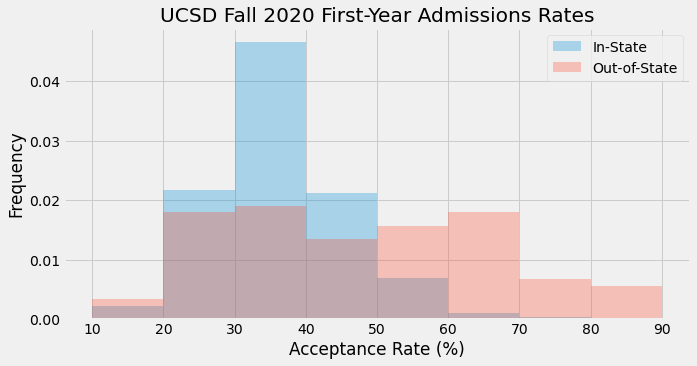

In [80]:
# Make your histogram here.
ucsd_5_1 = ucsd_state.get('AcceptanceRate')*100
ucsd_5_1_1 = ucsd_state.assign(acceptance_rate=ucsd_5_1)
ucsd_5_1_0 = ucsd_5_1_1[ucsd_5_1_1.get('instate')==True]
ax = ucsd_5_1_0.plot(kind='hist',y='acceptance_rate', density=True, figsize=(10, 5), alpha=0.3, bins=np.arange(10,100,10))

ucsd_5_1_2 = ucsd_5_1_1[ucsd_5_1_1.get('instate')==False]
ucsd_5_1_2.plot(ax=ax, kind='hist',y='acceptance_rate', density=True, figsize=(10, 5), alpha=0.3, bins=np.arange(10,100,10))
# # Don't change the following three lines
plt.title('UCSD Fall 2020 First-Year Admissions Rates')
plt.legend(['In-State', 'Out-of-State'])
plt.xlabel('Acceptance Rate (%)');

<!-- END QUESTION -->



### Question 5.2 (1 point)

In your own words, describe the differences between these two histograms. How do the shapes of the distributions vary?

<!-- BEGIN QUESTION -->


<!--
BEGIN QUESTION
name: q5_2
points: 1
manual: true
-->

The shape of acceptance rates for both in-state and out-of-state are symmetric shape. But the distribution for out-of-state is more spread, and the median for in-state is in the 30-40 bin, and for out-of-state, the median is in 40-50 bin, which means the in-state graph is close to perfect bell shape, and for out-of-state, it tends to be more uniform like from 20 to 70% of acceptance rate. And for in-state, it has a 0.045 frequency bin, but for out-of-state, the highest frequency for a single bin is around 0.018. 

<!-- END QUESTION -->



Additionally, why do you think the distributions are so different? (You don't need to answer this anywhere, it's just something to think about.)

### Question 5.3 (3 points)

Let's look at `ucsd_state` one last time.

In [81]:
ucsd_state

,Name,City,Region,Applied,Admitted,Enrolled,AcceptanceRate,YieldRate,instate
ID,,,,,,,,,
BEN LIPPEN SCHOOL410501,BEN LIPPEN SCHOOL,Columbia,SC,7,6,3,0.857143,0.500000,False
PELHAM MEMORIAL HIGH SCHOOL334470,PELHAM MEMORIAL HIGH SCHOOL,Pelham,NY,7,6,3,0.857143,0.500000,False
BASIS SCOTTSDALE CHARTER SCH30660,BASIS SCOTTSDALE CHARTER SCH,Scottsdale,AZ,22,18,4,0.818182,0.222222,False
SOUTHSIDE CHRISTIAN SCHOOL410907,SOUTHSIDE CHRISTIAN SCHOOL,Simpsonville,SC,5,4,3,0.800000,0.750000,False
FREEDOM HIGH SCHOOL472110,FREEDOM HIGH SCHOOL,South Riding,VA,5,4,3,0.800000,0.750000,False
...,...,...,...,...,...,...,...,...,...
LINCOLN HIGH SCHOOL54120,LINCOLN HIGH SCHOOL,San Diego,San Diego,66,11,7,0.166667,0.636364,True
CRAWFORD HIGH SCHOOL54630,CRAWFORD HIGH SCHOOL,San Diego,San Diego,81,13,5,0.160494,0.384615,True
NORWALK HIGH SCHOOL52167,NORWALK HIGH SCHOOL,Norwalk,Los Angeles,39,6,3,0.153846,0.500000,True


It turns out that there is exactly one city whose name is repeated in different regions.

Assign `repeated_city` to the name of this city, and assign `repeated_city_regions` to an array of the names of the unique repeated regions for this city (the order of the names in the array does not matter). **This is a very challenging problem!** We intend it to be a "fun" wrap-up exercise to the project. Since it's the last question, no other questions will depend on your answer to this question.

_**Hint 1:**_ You will need to use `.groupby` twice.

_**Hint 2:**_ You can use the `.reset_index` method if you want to convert the index of a DataFrame into a column.

_**Hint 3:**_ Once you have a Series containing the regions corresponding to `repeated_city`, use the function `np.unique` on the Series to get an array of the unique region names.

In [82]:
ucsd_5_3 = ucsd_state.groupby(['Region','City']).count().reset_index()
ucsd_5_3_1 = ucsd_state.groupby('City').count().reset_index()
ucsd_5_3_2 = ucsd_5_3.merge(ucsd_5_3_1, left_on = 'City', right_on='City')
ucsd_5_3_3 = ucsd_5_3_2[ucsd_5_3_2.get('Name_x')!=ucsd_5_3_2.get('Name_y')]
ucsd_5_3_3
#get the cities that appeared more than once in the data frame
#so we want to get these names in the data frame ucsd_state 
#and then group by regions to get what cities appeared more than once in different regions.
#city==city & Region!=Region


repeated_city = ucsd_5_3_3.get('City').iloc[0]
repeated_city_regions = np.array(ucsd_5_3_3.get('Region_x'))

# # Don't change the following two lines
print('repeated city:', repeated_city)
print('repeated regions:', repeated_city_regions)

repeated city: Lancaster
repeated regions: ['Los Angeles' 'PA']


In [83]:
grader.check("q5_3")

q5_3 results: All test cases passed!

## Congratulations! You've completed the Midterm Project! 🏁

All you need to do now is submit your assignment:

1. Select Kernel -> Restart & Run All to ensure that you have executed all cells, including the test cells. **If you do not do this, we may not be able to grade your work!**
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using File -> Download as -> Notebook (.ipynb), then upload your notebook to Gradescope. **Don't forget to add your partner to your group on Gradescope!**

If running all the tests at once causes a test to fail that didn't fail when you ran the notebook in order, check to see if you changed a variable's value later in your code. Make sure to use new variable names instead of reusing ones that are used in the tests.

Remember, the tests here and on Gradescope just check the format of your answers. We will run correctness tests after the assignment's due date has passed.

In [84]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_4 results: All test cases passed!

q1_6 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q2_8 results: All test cases passed!

q3_1 results: All test cases passed!

q3_10 results: All test cases passed!

q3_11 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

q3_9 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q4_5 resul